In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("insurance.csv")

EDA

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

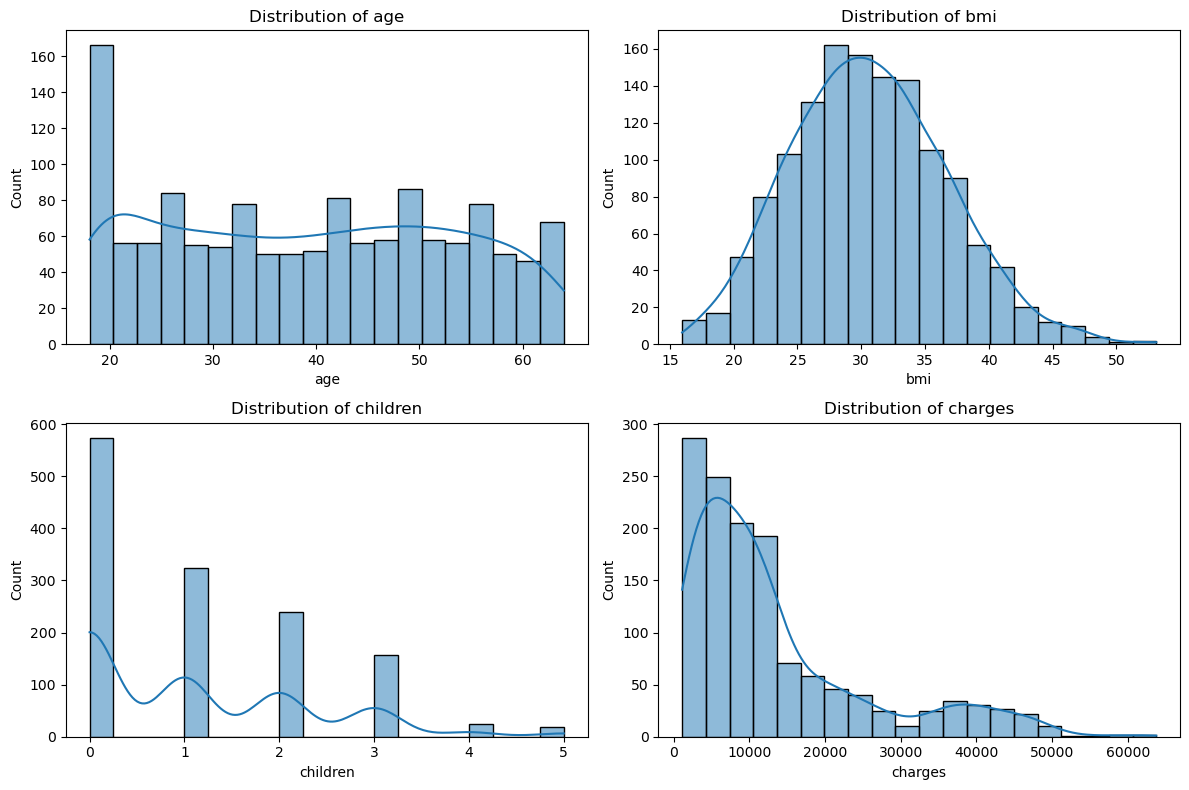

In [12]:

numeric_columns = ['age', 'bmi', 'children','charges']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()  # avoid overlap
plt.show()

<Axes: xlabel='children', ylabel='count'>

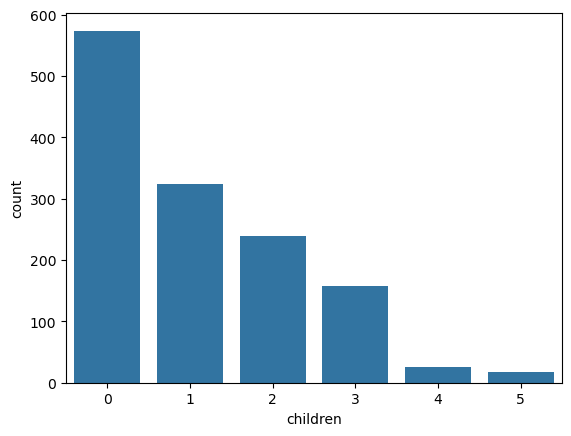

In [13]:
sns.countplot(x = df['children'])

<Axes: >

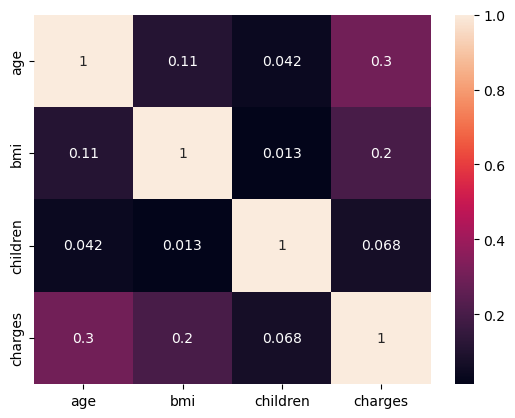

In [14]:
plt.Figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

CLEANING AND PREPROCESSING

In [15]:
df_cleaned = df.copy()

In [16]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df_cleaned.shape

(1338, 7)

In [18]:
df_cleaned.drop_duplicates(inplace=True)

In [19]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [20]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [21]:
df_cleaned["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [22]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male': 0, 'female': 1})
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no': 0, 'yes': 1})

In [23]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [24]:
df.rename(columns={'sex': 'is_female'}, inplace=True)
df.rename(columns={'smoker': 'is_smoker'}, inplace=True)
df.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
df['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [26]:
df_cleaned = pd.get_dummies(df_cleaned,columns = ['region'],drop_first=True)

In [27]:
df_cleaned.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [28]:
df_cleaned = df_cleaned.astype(int)

EXTRACTION

In [29]:
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


<Axes: xlabel='bmi', ylabel='Count'>

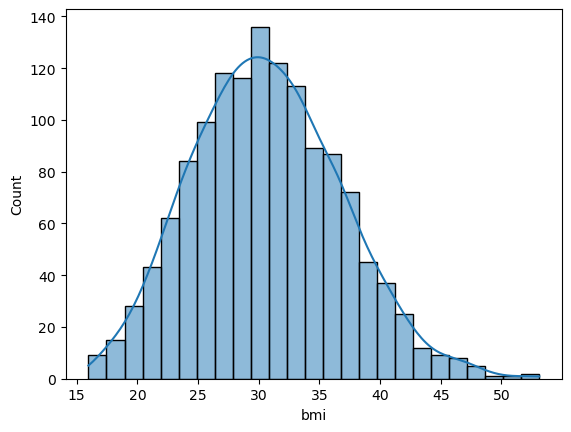

In [30]:
sns.histplot(df['bmi'], kde=True)

In [31]:
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [32]:
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [33]:
df_cleaned = pd.get_dummies(df_cleaned,columns = ['bmi_category'],drop_first=True)

In [34]:
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [35]:
df_cleaned = df_cleaned.astype(int)

In [36]:
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [37]:
df_cleaned.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [39]:
df_cleaned.rename(columns={'sex': 'is_female'}, inplace=True)
df_cleaned.rename(columns={'smoker': 'is_smoker'}, inplace=True)
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [40]:
import pandas as pd

df_all = pd.DataFrame(df_cleaned, columns=['age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'])  

df_all['target'] = df['charges']

In [41]:

correlations = df_all.corr()['target'].sort_values(ascending=False)

print(correlations)

target                     1.000000
is_smoker                  0.787234
age                        0.298308
bmi_category_Obese         0.200347
bmi                        0.196236
region_southeast           0.073578
children                   0.067389
region_northwest          -0.038695
region_southwest          -0.043637
is_female                 -0.058044
bmi_category_Normal       -0.104042
bmi_category_Overweight   -0.120601
Name: target, dtype: float64


In [42]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [43]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [44]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,charges_bin
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,3
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,3
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,1,2
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,1,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0,0


In [185]:
final_df = df_cleaned[[ 'age', 'bmi', 'is_smoker', 'charges']] #Best r2 and adj_r2 after trail and error

In [186]:
final_df.head()

,age,bmi,is_smoker,charges
0,-1.440418,-0.517949,1,16884
1,-1.511647,0.462463,0,1725
2,-0.799350,0.462463,0,4449
3,-0.443201,-1.334960,0,21984
4,-0.514431,-0.354547,0,3866


MODEL CREATION


In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X = final_df.drop('charges', axis= 1)
y = final_df['charges']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [190]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [191]:
model.fit(X_train,y_train)

LinearRegression()

In [192]:
y_pred = model.predict(X_test)

In [193]:
from sklearn.metrics import r2_score

In [194]:
r2 = r2_score(y_test,y_pred)
print(r2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1- r2) * (n - 1) / (n - p -1 )
adj_r2

0.8048630385283488


0.8026455730570801